4/4 ━━━━━━━━━━━━━━━━━━━━ 117s 23s/step
Number of failed predictions: 6
True label: 2, Predicted label: 1


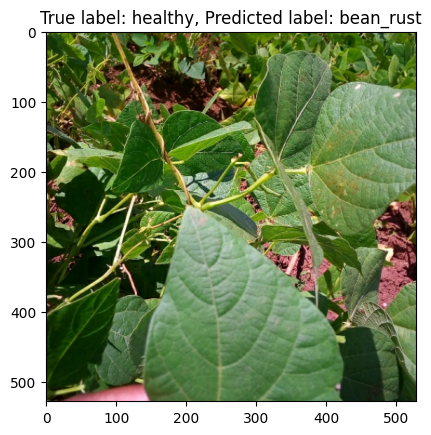

True label: 0, Predicted label: 1


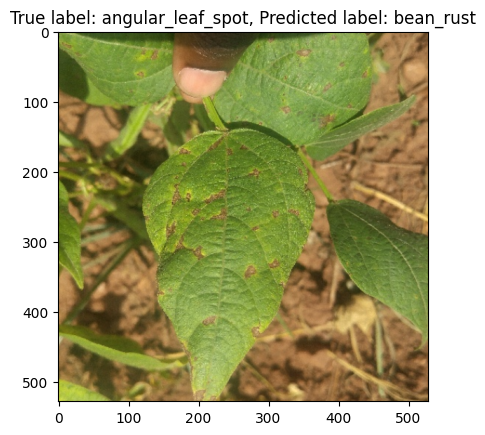

True label: 0, Predicted label: 1


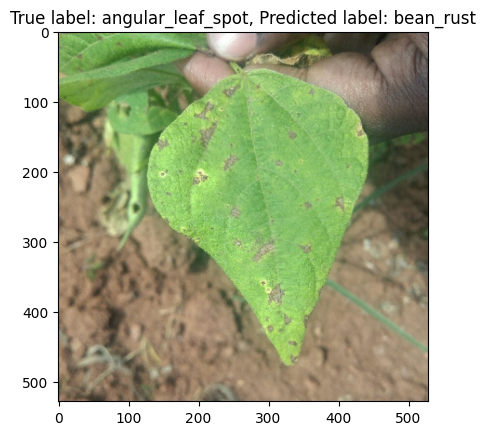

True label: 1, Predicted label: 0


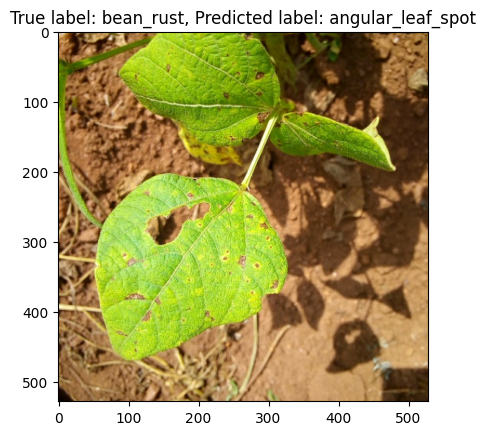

True label: 0, Predicted label: 1


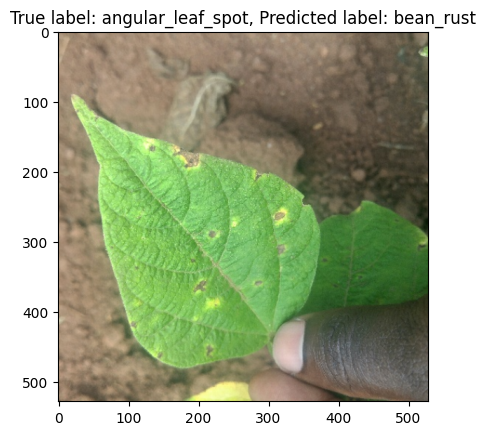

True label: 1, Predicted label: 0


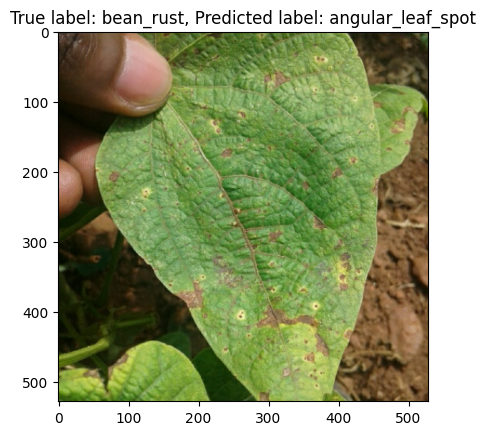

In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model('my_model.keras')

# Load the test dataset
ds_test, info = tfds.load('beans', split='test', with_info=True, as_supervised=True)
IMG_SIZE = 528
size = (IMG_SIZE, IMG_SIZE)
ds_test = ds_test.map(lambda image, label: (tf.image.resize(image, size), label))
class_names = info.features['label'].names

# Initialize lists to hold features and labels
X_test = []
y_test = []

# Iterate through the dataset and split into X and y
for image, label in tfds.as_numpy(ds_test):
    X_test.append(image)
    y_test.append(label)

# Convert lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Make predictions
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Identify failed predictions
failed_indices = np.where(predicted_labels != y_test)[0]

# Print failed images and their true labels
print("Number of failed predictions:", len(failed_indices))
for idx in failed_indices:
    true_label_name = class_names[y_test[idx]]
    predicted_label_name = class_names[predicted_labels[idx]]
    print(f"True label: {y_test[idx]}, Predicted label: {predicted_labels[idx]}")
    plt.imshow(X_test[idx].astype("uint8"))
    plt.title(f"True label: {true_label_name}, Predicted label: {predicted_label_name}")
    plt.show()